In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy

# <font color='red'> Problématique : Prédire la popularité d'un article </font>

#### Importation du dataset

In [2]:
df=pd.read_csv('/Users/clemencedelouche/Documents/ESILV/A4/Python/PROJET/OnlineNewsPopularity.csv')

#### Affichage du dataset

In [3]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [4]:
#On sauvegarde le dataset pour toujours avoir l'original après les changements 

original_df = copy(df)

#### Appropriation des données

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [6]:
df.shape

(39644, 61)

In [7]:
# Il y a 61 colonnes, on aura surement pas besoin de toutes les colonnes 

In [8]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [9]:
# On va donc supprimer les colonnes qui ne seront pas utiles 

df.drop(columns=" timedelta", inplace=True)

# On supprime timedelta qui corresponds aux jours entre la publication de l'article et l'acquisition du dataset
# De même, on peut supprimer la colonne 'url' qui ne nous seras pas utile :

df.drop(columns = 'url', inplace=True)
 

In [10]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [11]:
# on voit qu'il y a 6 colonnes : "weekday_is_monday,weekday_is_tuesday,...,is_wekend"
# Le dataframe sera plus lisible si on fait une seule colonne : jour de la semaine 
#df['publish_day']=df['publish_day'].apply(lambda x: "Monday" if x == 1 for x in df[' weekday_is_monday'])

df['publish_day']= 0 #On créer une nouvelle colonne 'publish day' que l'on rempli de 0

In [12]:
#map_dictionary ={1 : "Tuesday", 0 :0} 

  
#df['publish_day'] = df['publish_day'].map(map_dictionary)

df['publish_day'] = np.where(df[' weekday_is_monday']==1, 'Monday',df['publish_day'])

In [13]:
df['publish_day'] = np.where(df[' weekday_is_tuesday']==1, 'Tuesday',df['publish_day'])

In [14]:
df['publish_day'] = np.where(df[' weekday_is_wednesday']==1, 'Wednesday',df['publish_day'])

In [15]:
df['publish_day'] = np.where(df[' weekday_is_thursday']==1, 'Thursday',df['publish_day'])

In [16]:
df['publish_day'] = np.where(df[' weekday_is_friday']==1, 'Friday',df['publish_day'])

In [17]:
df['publish_day'] = np.where(df[' is_weekend']==1, 'Week-end',df['publish_day'])

In [18]:
df

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,publish_day
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Monday
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Monday
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Monday
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Monday
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,Wednesday
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,Wednesday
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,Wednesday
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,Wednesday


In [19]:
#Supprimer colonnes inutiles
df.drop(columns = ' weekday_is_monday', inplace=True)
df.drop(columns = ' weekday_is_tuesday', inplace=True)
df.drop(columns = ' weekday_is_wednesday', inplace=True)
df.drop(columns = ' weekday_is_thursday', inplace=True)
df.drop(columns = ' weekday_is_friday', inplace=True)
df.drop(columns = ' is_weekend', inplace=True)

df.drop(columns = ' weekday_is_saturday', inplace=True)
df.drop(columns = ' weekday_is_sunday', inplace=True)

In [20]:
print ("After weekday removal - ",df.shape)

After weekday removal -  (39644, 52)


In [21]:
#On fait la même chose avec les channels
df['channel'] = 0
df['channel'] = np.where(df[' data_channel_is_lifestyle']==1, 'Lifestyle',df['channel'])
df['channel'] = np.where(df[' data_channel_is_entertainment']==1, 'Entertainement',df['channel'])
df['channel'] = np.where(df[' data_channel_is_bus']==1, 'Business',df['channel'])
df['channel'] = np.where(df[' data_channel_is_socmed']==1, 'Social media',df['channel'])
df['channel'] = np.where(df[' data_channel_is_tech']==1, 'Tech',df['channel'])
df['channel'] = np.where(df[' data_channel_is_world']==1, 'World',df['channel'])


In [22]:
df

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,publish_day,channel
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Monday,Entertainement
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Monday,Business
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Monday,Business
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Monday,Entertainement
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Monday,Tech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,Wednesday,Tech
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,Wednesday,Social media
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,Wednesday,0
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,Wednesday,World


In [23]:
#Attention dans le tableau on voit qu'il y a au moins un 0 il faut faire attention, certains articles n'ont 
#peut être pas de channel 
#df['channel'] = np.where(df['channel']==0, 'Other',df['channel'])
df['channel'] = df['channel'].apply(lambda x: 'Other' if x == '0' else x) 

In [24]:
df

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,publish_day,channel
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Monday,Entertainement
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Monday,Business
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Monday,Business
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Monday,Entertainement
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Monday,Tech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,Wednesday,Tech
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,Wednesday,Social media
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,Wednesday,Other
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,Wednesday,World


In [25]:
#Supression des colonnes data_channel_is 
df.drop(columns = ' data_channel_is_lifestyle', inplace=True)
df.drop(columns = ' data_channel_is_entertainment', inplace=True)
df.drop(columns = ' data_channel_is_bus', inplace=True)
df.drop(columns = ' data_channel_is_socmed', inplace=True)
df.drop(columns = ' data_channel_is_tech', inplace=True)
df.drop(columns = ' data_channel_is_world', inplace=True)

In [26]:
print ("After channels removal - ",df.shape)

After channels removal -  (39644, 47)


## <font color='green'> Comment prédire la popularité d'un article ? Les questions à se poser </font>

In [27]:
# Quel est l'effet des images/vidéos sur la popularité ? (présence ou non / si oui combien )
# Est ce qu'il y a une correlation entre le nombre de mots dans l'article / dans le titre et sa popularité ? 
# Quels sont les meilleurs mots clés pour avoir un article populaire ? Quels sont les pires ? 
# Quel période de la semaine est la mieux pour publier un article ? 
# Est ce que le nombre de liens dans un article influe sur sa popularité ? 
# Quelles datachannels sont les plus populaires ? 



In [28]:
# Il faut d'abord pouvoir mesurer la popularité d'un article, pour cela il faut faire une "echelle de la popularité"
# On va considérer qu'un article est très populaire quand il a eu beaucoup de partage 
# Les articles avec le plus de partages seront considérés commme très populaires et ceux avec le moins de partage 
# seront considérés comme très peu populaires 

# Pour cela, on créer un nouveau dataframe :

df_shares = df[' shares']
df_shares


0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name:  shares, Length: 39644, dtype: int64

In [29]:
df_shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [30]:
df_shares.sort_values(ascending = False)

9365     843300
5370     690400
23237    663600
16268    652900
3145     617900
          ...  
18957        22
9771          8
38633         5
4709          4
17266         1
Name:  shares, Length: 39644, dtype: int64

In [31]:
df_shares.sort_values(ascending = False).head(1982)

9365     843300
5370     690400
23237    663600
16268    652900
3145     617900
          ...  
15486     10900
32156     10900
14790     10900
32180     10900
37532     10800
Name:  shares, Length: 1982, dtype: int64

In [32]:
df_shares.sort_values(ascending = False).head(3964)

9365     843300
5370     690400
23237    663600
16268    652900
3145     617900
          ...  
35850      6200
8348       6200
33201      6200
20215      6200
15940      6200
Name:  shares, Length: 3964, dtype: int64

In [33]:
df_shares.sort_values(ascending = False).head(11893)

9365     843300
5370     690400
23237    663600
16268    652900
3145     617900
          ...  
8592       2300
4531       2300
28706      2300
12879      2300
25771      2300
Name:  shares, Length: 11893, dtype: int64

In [34]:
df_shares.sort_values(ascending = False).head(19822)

9365     843300
5370     690400
23237    663600
16268    652900
3145     617900
          ...  
20380      1400
1958       1400
38115      1400
22475      1400
36616      1400
Name:  shares, Length: 19822, dtype: int64

In [35]:
df_shares.sort_values(ascending = False).head(29733)

9365     843300
5370     690400
23237    663600
16268    652900
3145     617900
          ...  
29731       946
32730       946
22161       946
24034       946
36438       946
Name:  shares, Length: 29733, dtype: int64

In [36]:
#L'article le moins partagé à eu un partage et le plus partagé a eu 843 300 partages 
# En moyenne, un article a 3 395 partages 

# Nous allons considérer l'échelle suivante :

# Extremement populaire : Top 95 % => les 1 982 premiers 
# Très populaire : Top 90 % => entre 1 983 et 3 964 
# Populaire : Top 70 % => entre 3 965 et 11 893
# Moyennement populaire : Top 50 % => entre 11 894 et 19 822
# Peu populaire : Top 25 % => entre 19 823 et 29 733
# Pas populaire du tout : Le reste => entre 29 733 et 39 644



# Pour cela on va créer une colonne "popularity" à notre dataframe

df['popularity'] = df[' shares']
df

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,publish_day,channel,popularity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Monday,Entertainement,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Monday,Business,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Monday,Business,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Monday,Entertainement,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Monday,Tech,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,Wednesday,Tech,1800
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,Wednesday,Social media,1900
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,Wednesday,Other,1900
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,Wednesday,World,1100


In [37]:
df['popularity'] = df['popularity'].apply(lambda x: 'Extremement populaire' if x > 10800 else 'Très populaire' if x > 6200  else 'Populaire' if x > 2300 else 'Moyennement Populaire' if x > 1400 else 'Peu populaire' if x > 946 else 'Pas populaire')


In [38]:
df

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,publish_day,channel,popularity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Monday,Entertainement,Pas populaire
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Monday,Business,Pas populaire
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Monday,Business,Moyennement Populaire
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Monday,Entertainement,Peu populaire
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Monday,Tech,Pas populaire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,Wednesday,Tech,Moyennement Populaire
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,Wednesday,Social media,Moyennement Populaire
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,Wednesday,Other,Moyennement Populaire
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,Wednesday,World,Peu populaire


In [39]:
plt.style.use('fivethirtyeight')

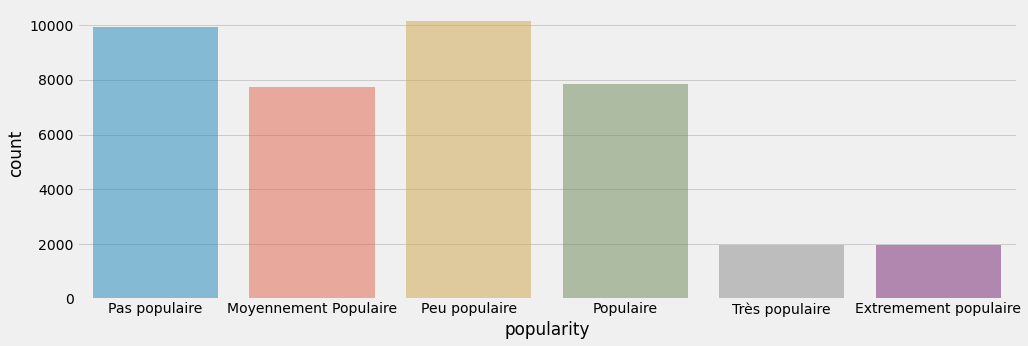

In [40]:
#Distribution de la popularité d'un article 

#plt.bar(popularity)
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='popularity',data=df,alpha=0.5)

In [41]:
# Nombre d'articles dans chaque classe de popularité
df_counts = df.groupby('popularity').size().reset_index()
df_counts.columns = ['Popularity','No of articles']
df_counts


,Popularity,No of articles
0,Extremement populaire,1981
1,Moyennement Populaire,7749
2,Pas populaire,9930
3,Peu populaire,10152
4,Populaire,7867
5,Très populaire,1965


In [42]:
df_counts.sort_values(by= 'No of articles', ascending = False)

,Popularity,No of articles
3,Peu populaire,10152
2,Pas populaire,9930
4,Populaire,7867
1,Moyennement Populaire,7749
0,Extremement populaire,1981
5,Très populaire,1965


## <font color='green'> Data Pre-processing </font>

In [43]:
# n_tokens_title: Number of words in the title 
df[' n_tokens_title'].describe()

count    39644.000000
mean        10.398749
std          2.114037
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000
Name:  n_tokens_title, dtype: float64

<AxesSubplot:>

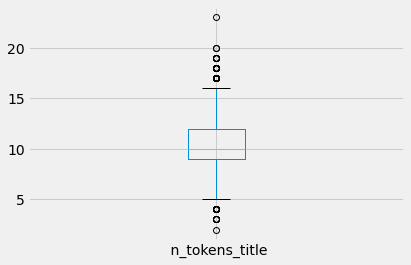

In [44]:
df.boxplot(column=[' n_tokens_title'])

In [45]:
# RAS sur le noise 

<AxesSubplot:xlabel='popularity', ylabel=' n_tokens_title'>

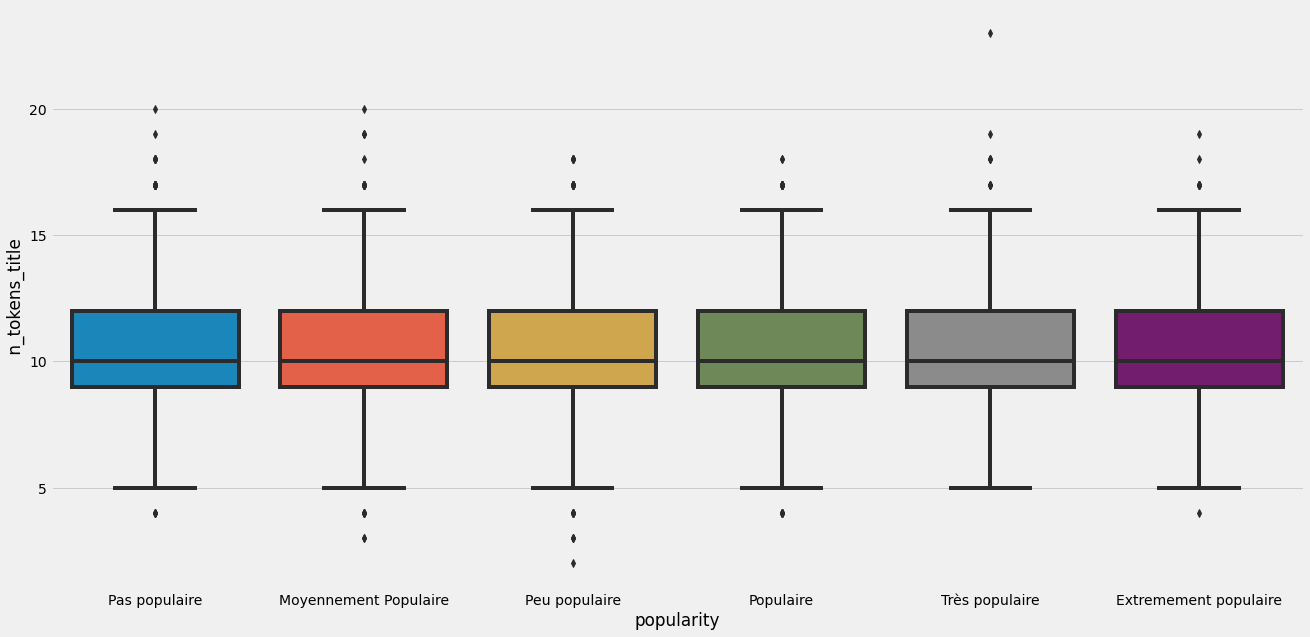

In [46]:
fig, axes = plt.subplots(figsize=(20,10))
sns.boxplot(x='popularity', y=' n_tokens_title', data=df, ax=axes)

In [47]:
# Cette visualisation nous permet de conclure que le nombre de mots dans le titre d'un article n'a pas 
#vraiment d'influence sur sa popularité 

#On peut supp ?

In [48]:
# n_token_content = Number of words in the content 
df[' n_tokens_content'].describe()

count    39644.000000
mean       546.514731
std        471.107508
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name:  n_tokens_content, dtype: float64

In [49]:
# Ici on voit que le minimum est 0, ce qui n'est pas possible car cela devrait dire qu'il n'y a aucun mot dans l'article,
# on supprime donc ceux = 0
df  = df[df[' n_tokens_content'] != 0]

In [50]:
print ("After noise removal - ",df.shape)

After noise removal -  (38463, 48)


<AxesSubplot:>

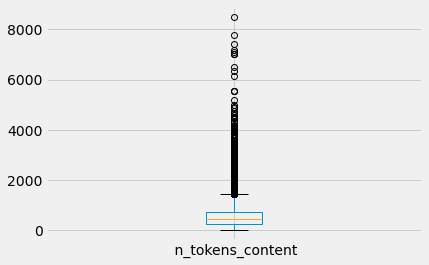

In [52]:
df.boxplot(column=[' n_tokens_content'])

<AxesSubplot:xlabel='popularity', ylabel=' n_tokens_content'>

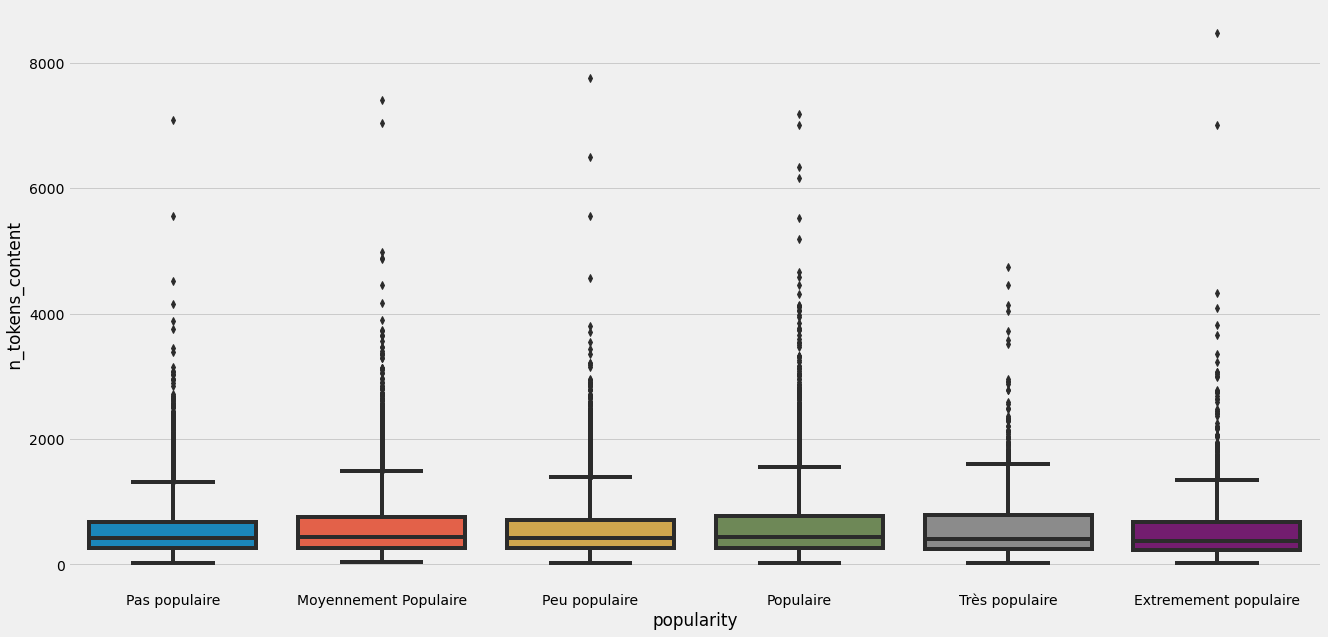

In [53]:
# Visualisation du nombre de mots selon les catégories: 
fig, axes = plt.subplots(figsize=(20,10))
sns.boxplot(x='popularity', y=' n_tokens_content', data=df, ax=axes)

In [54]:
# Cette visualisation nous permet de conclure que le nombre de mots dans un article n'a pas vraiment d'influence sur
# sa popularité 

# Supprimer la colonne ? 


In [55]:
# n_non_stop_words = rate of non stop words in the content
df[' n_non_stop_words'].describe()

count    38463.000000
mean         1.027065
std          5.307978
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name:  n_non_stop_words, dtype: float64

<AxesSubplot:>

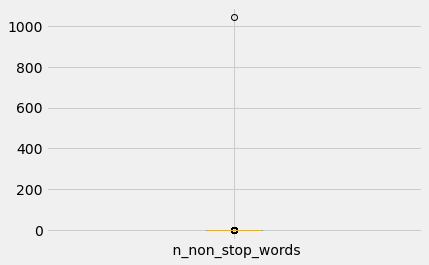

In [56]:
df.boxplot(column=[' n_non_stop_words'])

In [57]:
# on voit ici que le record de 'non-stop words'est de 1042
# on voit aussi que le minimum est 0 et que la plupart des données sont autour de 0, on supprime donc la donnée à part
# "1042" et on refait une visualisation

df = df[df[' n_non_stop_words'] != 1042]

<AxesSubplot:>

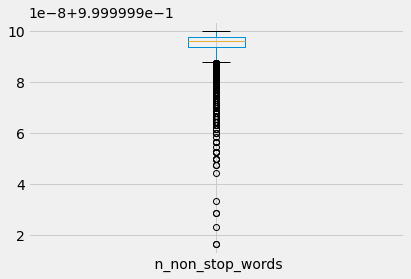

In [58]:
df.boxplot(column=[' n_non_stop_words'])

In [59]:
# On voit maintenant qu'il n'y a que 0 ou 1 non-stop word par article, on supprime donc cette colonne qui ne nous
# seras pas utile : 

df.drop(labels=[' n_non_stop_words'], axis = 1, inplace=True)

In [60]:
# num_hrefs: Number of links 
df[' num_hrefs'].describe()

count    38462.000000
mean        11.217877
std         11.340728
min          0.000000
25%          5.000000
50%          8.000000
75%         14.000000
max        304.000000
Name:  num_hrefs, dtype: float64

<AxesSubplot:>

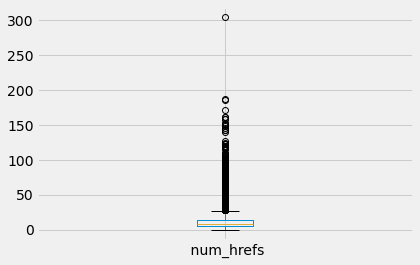

In [61]:
df.boxplot(column=[' num_hrefs'])

In [60]:
#La valeur maximale 304 semble être une valeur abberrante, nous allons la supprimer 
df = df[df[' num_hrefs'] != 304]

<AxesSubplot:xlabel='popularity', ylabel=' num_hrefs'>

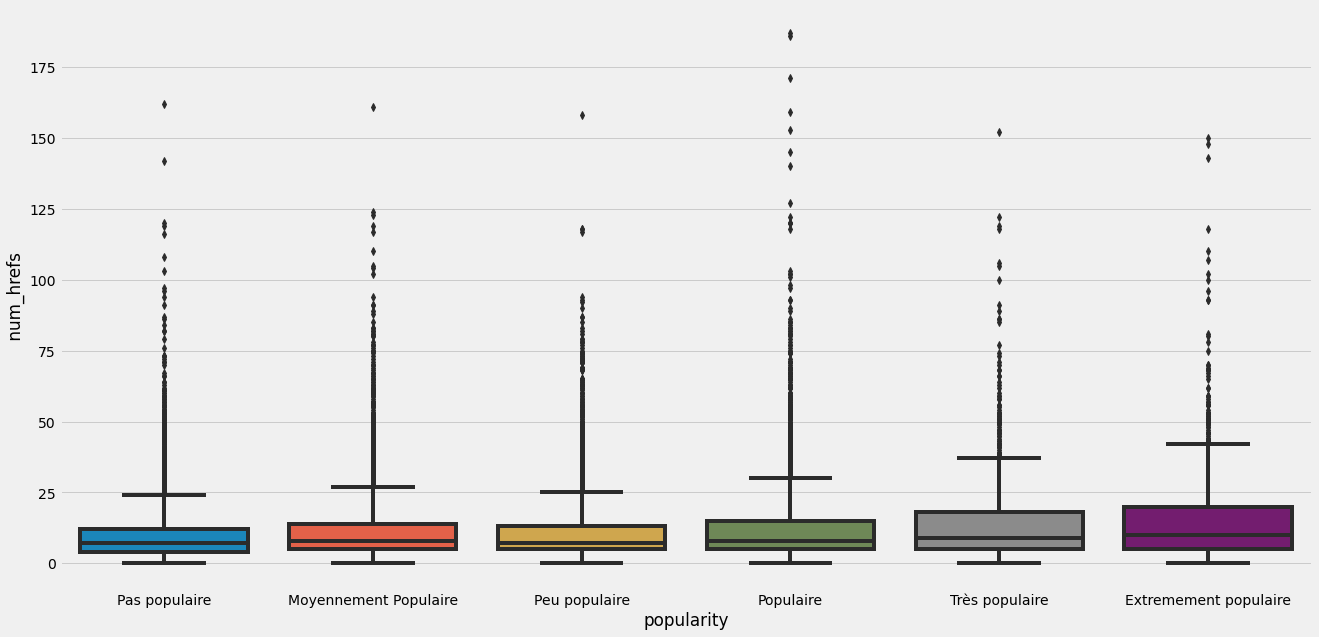

In [61]:
# Visualisation du nombre de liens selon les catégories: 
fig, axes = plt.subplots(figsize=(20,10))
sns.boxplot(x='popularity', y=' num_hrefs', data=df, ax=axes)

In [62]:
#Ici cela semble avoir une petite influence, nous allons donc renommer la colonne 
df.rename(columns = {' num_hrefs': 'nb_liens'}) 

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,nb_liens,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,publish_day,channel,popularity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Monday,Entertainement,Pas populaire
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Monday,Business,Pas populaire
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Monday,Business,Moyennement Populaire
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Monday,Entertainement,Peu populaire
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Monday,Tech,Pas populaire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,Wednesday,Tech,Moyennement Populaire
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,Wednesday,Social media,Moyennement Populaire
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,Wednesday,Other,Moyennement Populaire
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,Wednesday,World,Peu populaire


In [63]:
# num_imgs: Number of images 
df[' num_imgs'].describe()

count    38461.000000
mean         4.561946
std          8.292181
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        128.000000
Name:  num_imgs, dtype: float64

<AxesSubplot:>

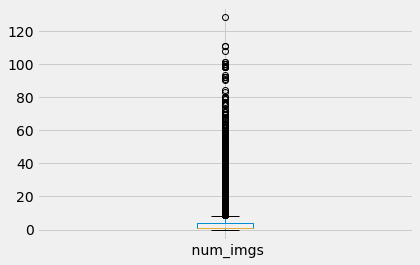

In [64]:
df.boxplot(column=[' num_imgs'])

<AxesSubplot:xlabel='popularity', ylabel=' num_imgs'>

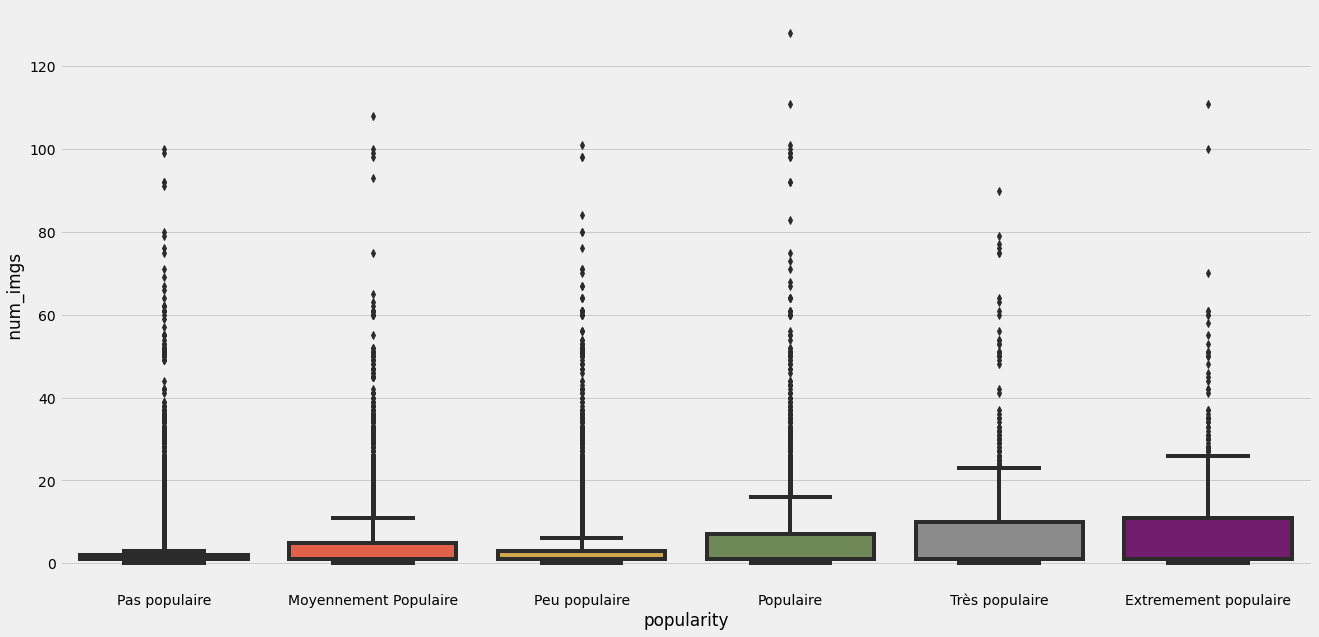

In [65]:
fig, axes = plt.subplots(figsize=(20,10))
sns.boxplot(x='popularity', y=' num_imgs', data=df, ax=axes)

In [66]:
#Ici aussi ça a l'air d'avoir une influence

In [67]:
#  num_videos: Number of videos 
df[' num_videos'].describe()

count    38461.000000
mean         1.263852
std          4.164994
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name:  num_videos, dtype: float64

<AxesSubplot:>

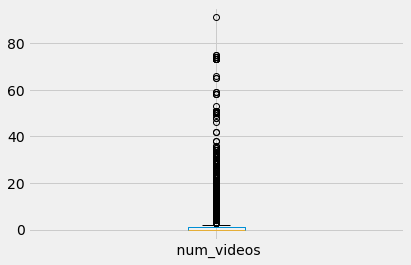

In [68]:
df.boxplot(column=[' num_videos'])

<AxesSubplot:xlabel='popularity', ylabel=' num_videos'>

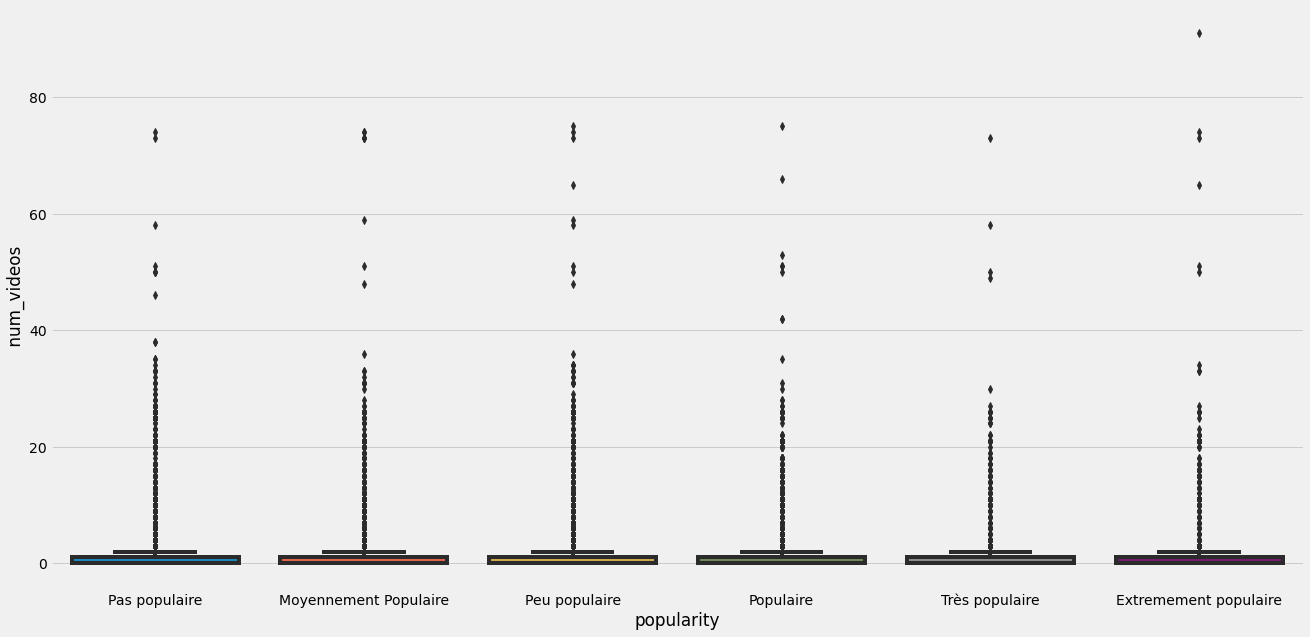

In [69]:
fig, axes = plt.subplots(figsize=(20,10))
sns.boxplot(x='popularity', y=' num_videos', data=df, ax=axes)

In [70]:
# Ici le nombre de vidéos dans un artcile ne semble pas avoir d'influence, on va donc supprimer la colonne :


df.drop(columns = ' num_videos', inplace=True)

In [71]:
# kw_min_min: Worst keyword (min. shares) 
data[' kw_min_min'].describe()

NameError: name 'data' is not defined

In [85]:
kw_columns = [' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', 
            ' kw_max_avg', ' kw_avg_avg', ' shares']
kw_columns

[' kw_min_min',
 ' kw_max_min',
 ' kw_avg_min',
 ' kw_min_max',
 ' kw_max_max',
 ' kw_avg_max',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' shares']

In [ ]:
sns.pairplot(temp_data, vars=kw_columns, hue='popularity', diag_kind='kde')